##STEP 1 : Generate directed and undirected graphs from train.csv

In [ ]:
import networkx as nx
import requests
import csv
from io import StringIO

def get_directed_graph(file):
    G = nx.DiGraph()
    count = 1
    for row_data in file:
        if count % 1000 == 0:
            print(count)
        node = int(row_data[0])
        for neighbor in row_data[1:]:
            G.add_edge(node, int(neighbor))
        count +=1

    return G


def get_undirected_graph(file):
    G = nx.Graph()
    count = 1
    for row_data in file:
        if count % 1000 == 0:
            print(count)
        node = int(row_data[0])
        for neighbor in row_data[1:]:
            G.add_edge(node, int(neighbor))
        count +=1

    return G

#Read remote train.csv and parse it with csvreader:
url = 'https://media.githubusercontent.com/media/NeerajSura/PML/main/LinkPrediction/train.csv'
response = requests.get(url)
content = response.text
csv_reader = csv.reader(StringIO(content))


UG = get_undirected_graph(csv_reader)
#DG = get_directed_graph(csv_reader)
print("Number of nodes:", UG.number_of_nodes())
print("Number of edges:", UG.number_of_edges())



1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
Number of nodes: 4867136
Number of edges: 23415200


## Step 2 : Generate positive and negative samples from train.csv

In [ ]:
# create a train_dic dictionary which will be used for sampling
def make_train_data_dict(url):
  #Read remote train.csv and parse it with csvreader:
  response = requests.get(url)
  content = response.text
  csv_reader = csv.reader(StringIO(content))

  train_dict = {}
  for row in csv_reader:
    neighbor_list = [int(i) for i in row]
    train_dict[neighbor_list[0]] = set(neighbor_list[1:])
  return train_dict

# Get unique values of sources and sinks from train.csv
def get_train_sources_and_sinks_from_csv(url):
  #Read remote train.csv and parse it with csvreader:
  response = requests.get(url)
  content = response.text
  csv_reader = csv.reader(StringIO(content))

  sources = set()
  sinks = set()
  for row in csv_reader:
    sources.add(int(row[0]))
    for i in range(1, len(row)):
      sinks.add(int(row[i]))
  return sources, sinks


print("Making train dictionary from train.csv ...")
train_dict = make_train_data_dict(url)
print("Dictionary created successfully.")

train_sources, train_sinks = get_train_sources_and_sinks_from_csv(url)
print("Number of sources:", len(train_sources))
print("Number of sinks:", len(train_sinks))


Making train dictionary from train.csv ...
Dictionary created successfully.
Number of sources: 20000
Number of sinks: 4867136


In [ ]:
#Generate positive and negative pairs
import random
import numpy as np

def positive_sampling(n_samples):
    print(f"Sampling {n_samples} Positive pairs")
    positive_samples=[]
    count=0
    for i in range(n_samples):
        if (count % 1000 == 0):
            print(count)
        count+=1
        source_random_index=random.randint(0,19999)
        source=(list(train_sources))[source_random_index]
        chosen_source_sinks=train_dict[source] # fetch neighbors of selected source from train_dict
        try:
            sink=random.choice(list(chosen_source_sinks)) # chose any random neighbor
            positive_samples.append((source,sink)) # append to the list
        except:
            pass
    print('Length of positive samples list is :', len(positive_samples))
    return positive_samples


def negative_sampling(n_samples):
    print(f"Sampling {n_samples} Negative pairs")
    negative_samples=[]
    count = 0
    for i in range(n_samples):
        if (count % 1000 == 0):
            print(count)
        count+=1
        source_random_index=random.randint(0,19999)
        source=(list(train_sources))[source_random_index]
        chosen_source_sinks=train_dict[source] # fetch neighbors of selected source from train_dict
        sink=random.choice(list(train_sinks)) # Choose any random neighbor node from any source
        if sink not in chosen_source_sinks: # If chosen neighbor is not in the neighbors of chosen source then we have a negative pair
            negative_samples.append((source, sink))
    print('Length of negative samples list is :', len(negative_samples))
    return negative_samples

num_samples = 20000
positive_samples=positive_sampling(num_samples)
np.save('positive_samples.npy',np.array(positive_samples)) # Save as np array for future reference

negative_samples=negative_sampling(num_samples)
np.save('negative_samples.npy',np.array(negative_samples)) # Save as np array for future reference


Sampling 20000 Positive pairs
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
Length of positive samples list is : 19552
Sampling 20000 Negative pairs
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
Length of negative samples list is : 19994


In [ ]:
from google.colab import files
files.upload()

Saving test.csv to test.csv


{'test.csv': b'\xef\xbb\xbfId,From,To\r1,3360982,4457271\r2,4761876,4698439\r3,4198430,3615486\r4,2945770,747948\r5,3950088,3360335\r6,2483976,1928881\r7,2785328,2672575\r8,385505,2877637\r9,4800097,1627742\r10,1399778,3338838\r11,178544,933485\r12,3116667,3394409\r13,4822324,3798666\r14,1014631,34363\r15,3637130,4624715\r16,572186,3573892\r17,4367817,848637\r18,2740302,4432643\r19,697676,774739\r20,233754,4372301\r21,2356466,2928383\r22,4511229,1707831\r23,1334864,4734827\r24,4823249,1941668\r25,2495939,3611146\r26,4539933,3701998\r27,2267515,299146\r28,414044,485185\r29,1770141,3706320\r30,4825426,2222470\r31,3571629,1964039\r32,2607822,4362893\r33,1606185,3693868\r34,2245172,4670041\r35,1668501,618303\r36,4801585,1889842\r37,4461666,3254522\r38,622210,4323012\r39,2988815,1276204\r40,3364505,3274350\r41,2842255,2202632\r42,121165,442888\r43,1902150,1982099\r44,2504780,4425830\r45,3515936,2226043\r46,1341663,194531\r47,2374063,1540939\r48,2695970,324371\r49,1274819,817807\r50,4468501,

In [ ]:
import pandas as pd
import numpy as np

positive_samples=np.load("20K_positive_samples.npy").tolist()
negative_samples=np.load("20K_negative_samples.npy").tolist()

def get_test_samples():
    test_data = pd.read_csv('test.csv')
    columns_to_convert = ['From', 'To']
    test_samples = test_data[columns_to_convert].values
    return test_samples.tolist()
test_samples = get_test_samples()

## STEP 3 : Feature Engineering

####1.Undirected Graph Features

In [ ]:
import networkx as nx
import csv
import numpy as np

def extract_features_positive_samples():
    features = []
    count = 0
    print("Generating positive samples features......")
    for sample in positive_samples:
        if (count % 1000 == 0):
            print(count)
        count += 1
        feature = []
        try:
            preds = nx.resource_allocation_index(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.jaccard_coefficient(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.adamic_adar_index(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.preferential_attachment(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            feature.append(1)  # label=1

        except Exception as e:
            print("one error at: "+str(count))
            print(e)
            pass
        features.append(feature)
    print("positive samples features: "+str(len(features)))
    return features


def extract_features_negative_samples():
    features = []
    count = 0
    print("Generating negative samples features......")
    for sample in negative_samples:
        if (count % 1000 == 0):
            print(count)
        count += 1
        feature = []
        try:
            preds = nx.resource_allocation_index(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.jaccard_coefficient(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.adamic_adar_index(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.preferential_attachment(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            feature.append(0)  # label=0
        except Exception as e:
            print("one error at: "+str(count))
            print(e)
            pass
        features.append(feature)

    print("negative samples features: "+str(len(features)))
    return features

def extract_features_test_samples():
    features = []
    count = 0
    print("Generating test samples features......")
    for sample in test_samples:
        if (count % 1000 == 0):
            print(count)
        count += 1
        feature = []
        try:
            preds = nx.resource_allocation_index(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.jaccard_coefficient(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.adamic_adar_index(UG, [sample])
            for u, v, p in preds:
                feature.append(p)

            preds = nx.preferential_attachment(UG, [sample])
            for u, v, p in preds:
                feature.append(p)
        except Exception as e:
            print("one error at: "+str(len(count)))
            print(e)
            pass
        features.append(feature)

    return features

# add features and label, combine
def generate_traning_data_from_UG():
    positive_features_ug = extract_features_positive_samples()
    negative_features_ug = extract_features_negative_samples()
    features_ug = positive_features_ug + negative_features_ug
    # random.shuffle(features)
    return features_ug


traning_data_ug = generate_traning_data_from_UG()

def write_train_to_csv(traning_data):
    with open("train_ug_20k_samples.csv","w",newline="") as csvfile:
        writer=csv.writer(csvfile)
        writer.writerow(["RA","JC","AA","PA","Label"])
        writer.writerows(traning_data)

write_train_to_csv(traning_data_ug)

def write_test_to_csv(test_data):
    with open("test_ug_20k_samples.csv","w",newline="") as csvfile:
        writer=csv.writer(csvfile)
        writer.writerow(["RA","JC","AA","PA"])
        writer.writerows(test_data)

test_data=extract_features_test_samples()
write_test_to_csv(test_data)



Generating positive samples features......
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
positive samples features: 19588
Generating negative samples features......
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
negative samples features: 19995
Generating test samples features......
0
1000


####2.Sparse Adjacency Matrix Features

In [ ]:
# Construct Adjacency Matrix
import requests
from scipy.sparse import csr_matrix

print("Generating matrix......")

# Fetching CSV data from GitHub
url = 'https://github.com/NeerajSura/PML/raw/main/LinkPrediction/train.csv'
response = requests.get(url)

row = []
col = []
data = []

# Parsing CSV data
for line in response.text.split('\n'):
    if line.strip():  # Check if the line is not empty
        neighbour_list = [int(i) for i in line.split(',') if i.strip()]  # Remove empty values
        for i in range(1, len(neighbour_list)):
            row.append(neighbour_list[0])
            col.append(neighbour_list[i])
            data.append(1)

# Constructing CSR matrices
source_sink_matrix = csr_matrix((data, (row, col)), shape=(4867136, 4867136))
sink_source_matrix = csr_matrix((data, (col, row)), shape=(4867136, 4867136))

Generating matrix......


In [ ]:
from math import sqrt

def cos_sim(X,Y):
    try:
        return (np.dot(X,Y.T)/(sqrt(X.nnz)*sqrt(Y.nnz))).toarray()[0][0]
    except:
        return 0

def pre_pre_cos(key1,key2):
    return cos_sim(sink_source_matrix[key1],sink_source_matrix[key2])
def suc_pre_cos(key1,key2):
    return cos_sim(source_sink_matrix[key1],sink_source_matrix[key2])


In [ ]:
def extract_features_positive_samples():
    features = []
    count = 0
    print("Generating positive samples features......")
    for sample in positive_samples:
        if (count % 1000 == 0):
            print(count)
        count += 1
        feature = []
        try:
            feature.append(pre_pre_cos(sample[0], sample[1]))
            feature.append(suc_pre_cos(sample[0], sample[1]))
            feature.append(1)  # label=1

        except Exception as e:
            print(e)
            pass
        features.append(feature)
    print("positive samples features: " + str(len(features)))
    return features

def extract_features_negative_samples():
    features = []
    count = 0
    print("Generating negative samples features......")
    for sample in negative_samples:
        if (count % 1000 == 0):
            print(count)
        count += 1
        feature = []
        try:
            feature.append(pre_pre_cos(sample[0], sample[1]))
            feature.append(suc_pre_cos(sample[0], sample[1]))
            feature.append(0)  # label=0
        except:
            print("one error at: " + str(count))
            pass
        features.append(feature)
    print("negative samples features: " + str(len(features)))
    return features

def extract_features_test_samples():
    features = []
    count = 0
    print("Generating test samples features......")
    for sample in test_samples:
        if (count % 1000 == 0):
            print(count)
        count += 1
        feature = []
        try:
            feature.append(pre_pre_cos(sample[0], sample[1]))
            feature.append(suc_pre_cos(sample[0], sample[1]))
        except:
            print("one error at: " + str(count))
            pass
        features.append(feature)
    print("test samples features: " + str(len(features)))
    return features


def generate_traning_data_from_CSR():
    positive_features_csr = extract_features_positive_samples()
    negative_features_csr = extract_features_negative_samples()
    features_csr = positive_features_csr + negative_features_csr
    # random.shuffle(features)
    return features_csr

traning_data = generate_traning_data_from_CSR()

def write_train_to_csv(traning_data):
    with open("train_csr_10k_samples.csv", "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["PPS", "SPS","Label"])
        writer.writerows(traning_data)
write_train_to_csv(traning_data)

def write_test_to_csv(test_data):
    with open("test_csr_10k_samples.csv", "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["PPS", "SPS"])
        writer.writerows(test_data)
test_data = extract_features_test_samples()
write_test_to_csv(test_data)


Generating positive samples features......
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
positive samples features: 9783
Generating negative samples features......
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
negative samples features: 9995
Generating test samples features......
0
1000
test samples features: 2000


## STEP 4 : Modelling


####Random Forest Classification

In [ ]:
from google.colab import files
files.upload()

In [4]:
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('train_merged_20k_samples.csv')
dataset

,RA,JC,AA,PA,PPS,SPS,Label
0,0.000000,0.000000,0.000000,665,0.000000,0.000000,1
1,0.000000,0.000000,0.000000,6,0.000000,0.000000,1
2,0.083930,0.110465,3.288578,7638,0.364405,0.242831,1
3,0.000000,0.000000,0.000000,66,0.000000,0.000000,1
4,0.022514,0.024390,0.866209,2000,0.271163,0.113813,1
...,...,...,...,...,...,...,...
39578,0.000000,0.000000,0.000000,330,0.000000,0.000000,0
39579,0.000000,0.000000,0.000000,126,0.000000,0.000000,0
39580,0.000000,0.000000,0.000000,368,0.000000,0.000000,0
39581,0.000000,0.000000,0.000000,23,0.000000,0.000000,0


In [8]:
FEATURE_SIZE=6
feature_names = dataset.columns[:FEATURE_SIZE]
print(feature_names)

X = dataset.iloc[:,:FEATURE_SIZE].values
y = dataset.iloc[:, FEATURE_SIZE].values


Index(['RA', 'JC', 'AA', 'PA', 'PPS', 'SPS'], dtype='object')


In [9]:
X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.65000000e+02,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [8.39300950e-02, 1.10465116e-01, 3.28857821e+00, 7.63800000e+03,
        3.64405444e-01, 2.42830932e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.68000000e+02,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.30000000e+01,
        0.00000000e+00, 0.00000000e+00],
       [2.43000000e-06, 3.42465800e-03, 7.73450850e-02, 2.92000000e+02,
        0.00000000e+00, 5.95491330e-02]])

In [10]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
x_train.shape

(31666, 6)

In [16]:
x_test.shape

(7917, 6)

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Predicting the Test set results and calculating accuracy
y_pred = rf_classifier.predict(x_test)
acc = rf_classifier.score(x_test, y_test)
print("Accuracy:", acc)

Accuracy: 0.837059492231906


In [20]:
from sklearn.metrics import roc_auc_score

# Predicting probabilities for AUC score
y_pred_proba = rf_classifier.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

AUC Score: 0.8683730222659201


In [22]:
testdata = pd.read_csv('test_merged_20k_samples.csv')
x_testing = testdata.iloc[:,:FEATURE_SIZE].values
x_testing = sc.transform(x_testing)
predictions=rf_classifier.predict_proba(x_testing)

In [23]:
x_testing

array([[ 5.47455834e+00,  6.57595179e-01,  1.57364259e+00,
        -6.85606938e-04,  8.95549520e-01,  8.58804178e-01],
       [-9.12554524e-02, -3.57918702e-01, -1.20062332e-01,
        -4.49509147e-02, -5.58709126e-01, -4.65014356e-01],
       [-9.12554524e-02, -3.57918702e-01, -1.20062332e-01,
        -2.78138453e-02, -5.58709126e-01, -4.65014356e-01],
       ...,
       [-4.90468592e-02,  5.89674231e-01, -5.04573759e-02,
        -4.50767476e-02,  1.40674675e+00,  1.39801070e+00],
       [-9.12535793e-02, -1.26110840e-01, -1.14328261e-01,
        -4.51047196e-02, -5.58709126e-01,  5.03358620e-02],
       [-9.12554524e-02, -3.57918702e-01, -1.20062332e-01,
        -4.47586380e-02, -5.58709126e-01, -4.65014356e-01]])

In [24]:
import csv
with open("Predictions_exp5.csv","w",newline="") as csvfile:
    writer=csv.writer(csvfile)
    writer.writerow(["Id","Predictions"])
    test_id=1
    for prediction in predictions:
        writer.writerow([test_id,prediction[1]])
        test_id+=1

**Hyperparameter Tuning Using GridSearchCV**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset
dataset = pd.read_csv('train_merged_20k_samples.csv')

FEATURE_SIZE = 6
feature_names = dataset.columns[:FEATURE_SIZE]
print("Feature Names:", feature_names)

X = dataset.iloc[:, :FEATURE_SIZE].values
y = dataset.iloc[:, FEATURE_SIZE].values

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2)

# Fit the grid search to the data
print("Grid Search in progress...")
grid_search.fit(x_train, y_train)
print("Grid Search completed.")

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf = grid_search.best_estimator_

# Predicting probabilities for AUC score using the best model
y_pred_proba_best = best_rf.predict_proba(x_test)[:, 1]
auc_best = roc_auc_score(y_test, y_pred_proba_best)
print("Best AUC Score:", auc_best)

# Extract mean cross-validated AUC scores for each hyperparameter combination
mean_scores = grid_search.cv_results_['mean_test_score']
mean_scores = np.array(mean_scores).reshape(len(param_grid['n_estimators']),
                                            len(param_grid['max_depth']),
                                            len(param_grid['min_samples_split']),
                                            len(param_grid['min_samples_leaf']))

# Create a heatmap of mean AUC scores for different hyperparameter combinations
plt.figure(figsize=(10, 8))
for i, est in enumerate(param_grid['n_estimators']):
    for j, depth in enumerate(param_grid['max_depth']):
        plt.plot(param_grid['min_samples_split'], mean_scores[i, j, :, :].mean(axis=1),
                 marker='o', label='n_estimators={}, max_depth={}'.format(est, depth))

plt.xlabel('min_samples_split')
plt.ylabel('Mean AUC Score')
plt.title('Mean AUC Score for Different Hyperparameter Combinations')
plt.legend()
plt.grid(True)
plt.show()


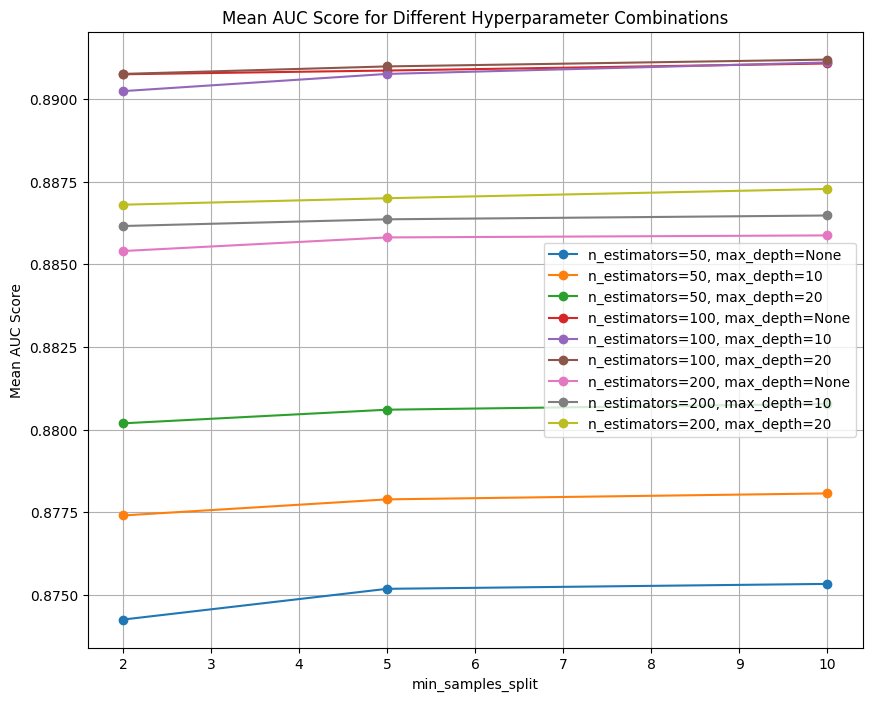

In [33]:
# Extract mean cross-validated AUC scores for each hyperparameter combination
mean_scores = grid_search.cv_results_['mean_test_score']
mean_scores = np.array(mean_scores).reshape(len(param_grid['n_estimators']),
                                            len(param_grid['max_depth']),
                                            len(param_grid['min_samples_split']),
                                            )

# Create a heatmap of mean AUC scores for different hyperparameter combinations
plt.figure(figsize=(10, 8))
for i, est in enumerate(param_grid['n_estimators']):
    for j, depth in enumerate(param_grid['max_depth']):
        mean_auc = mean_scores[i, j]
        plt.plot(param_grid['min_samples_split'], mean_auc,
                 marker='o', label='n_estimators={}, max_depth={}'.format(est, depth))

plt.xlabel('min_samples_split')
plt.ylabel('Mean AUC Score')
plt.title('Mean AUC Score for Different Hyperparameter Combinations')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
# Best Random Forest Classifier
rf_classifier = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)

In [37]:
# Predicting the Test set results and calculating accuracy
y_pred = rf_classifier.predict(x_test)
acc = rf_classifier.score(x_test, y_test)
print("Accuracy:", acc)

Accuracy: 0.850195781230264


In [38]:
from sklearn.metrics import roc_auc_score

# Predicting probabilities for AUC score
y_pred_proba = rf_classifier.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

AUC Score: 0.8923303038311139


In [39]:
testdata = pd.read_csv('test_merged_20k_samples.csv')
x_testing = testdata.iloc[:,:FEATURE_SIZE].values
x_testing = sc.transform(x_testing)
predictions=rf_classifier.predict_proba(x_testing)

In [40]:
x_testing

array([[ 5.47455834e+00,  6.57595179e-01,  1.57364259e+00,
        -6.85606938e-04,  8.95549520e-01,  8.58804178e-01],
       [-9.12554524e-02, -3.57918702e-01, -1.20062332e-01,
        -4.49509147e-02, -5.58709126e-01, -4.65014356e-01],
       [-9.12554524e-02, -3.57918702e-01, -1.20062332e-01,
        -2.78138453e-02, -5.58709126e-01, -4.65014356e-01],
       ...,
       [-4.90468592e-02,  5.89674231e-01, -5.04573759e-02,
        -4.50767476e-02,  1.40674675e+00,  1.39801070e+00],
       [-9.12535793e-02, -1.26110840e-01, -1.14328261e-01,
        -4.51047196e-02, -5.58709126e-01,  5.03358620e-02],
       [-9.12554524e-02, -3.57918702e-01, -1.20062332e-01,
        -4.47586380e-02, -5.58709126e-01, -4.65014356e-01]])

In [41]:
import csv
with open("Predictions_exp5.csv","w",newline="") as csvfile:
    writer=csv.writer(csvfile)
    writer.writerow(["Id","Predictions"])
    test_id=1
    for prediction in predictions:
        writer.writerow([test_id,prediction[1]])
        test_id+=1